In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

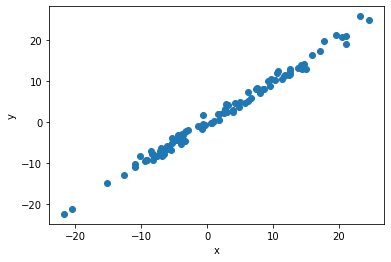

In [2]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')


In [3]:
class LR(nn.Module): # Module itself will typically act as a base class for all neural network modules.
    def __init__(self, input_size, output_size): # init 는 constructor : to construct to initialize new instances of this class
        # self simply represents the instance of the class
        super().__init__() 
        self.linear = nn.Linear(input_size, output_size) # represents the instance of the class, the object that we intend to initialized
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)

In [6]:
[w, b] = model.parameters()
print(w, b)

def get_params():
    return  (w[0][0].item(), b[0].item())

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [7]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

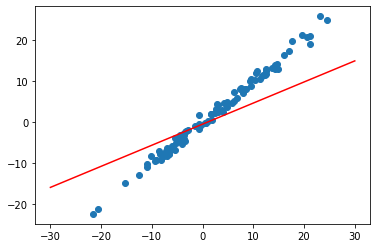

In [8]:
plot_fit('Initial Model')

In [12]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [13]:
epochs = 100 
losses = [] 

for i in range(epochs):   
   y_pred = model.forward(X)   
   loss = criterion(y_pred, y)   
   print("epoch:", i, "loss:", loss.item())      
   losses.append(loss)  
   optimizer.zero_grad()   
   loss.backward()   
   optimizer.step()

epoch: 0 loss: 13932.4228515625
epoch: 1 loss: 14839.99609375
epoch: 2 loss: 15806.7021484375
epoch: 3 loss: 16836.390625
epoch: 4 loss: 17933.140625
epoch: 5 loss: 19101.33984375
epoch: 6 loss: 20345.6328125
epoch: 7 loss: 21670.96484375
epoch: 8 loss: 23082.677734375
epoch: 9 loss: 24586.357421875
epoch: 10 loss: 26187.9765625
epoch: 11 loss: 27893.96484375
epoch: 12 loss: 29711.05078125
epoch: 13 loss: 31646.51953125
epoch: 14 loss: 33708.1015625
epoch: 15 loss: 35903.9375
epoch: 16 loss: 38242.86328125
epoch: 17 loss: 40734.15234375
epoch: 18 loss: 43387.75390625
epoch: 19 loss: 46214.19921875
epoch: 20 loss: 49224.7109375
epoch: 21 loss: 52431.375
epoch: 22 loss: 55847.01171875
epoch: 23 loss: 59485.109375
epoch: 24 loss: 63360.265625
epoch: 25 loss: 67487.8984375
epoch: 26 loss: 71884.34375
epoch: 27 loss: 76567.3125
epoch: 28 loss: 81555.375
epoch: 29 loss: 86868.2578125
epoch: 30 loss: 92527.2421875
epoch: 31 loss: 98554.8515625
epoch: 32 loss: 104975.1171875
epoch: 33 loss: 11

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

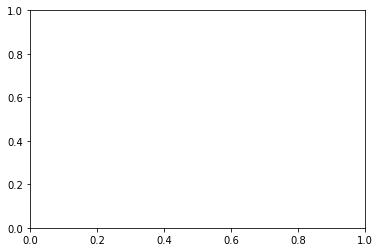

In [14]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

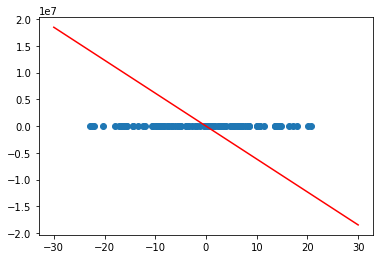

In [ ]:
plot_fit("Trained Model")